<a href="https://colab.research.google.com/github/sameekshya1999/Sleep-Stage-Classification-Using-Deep-Learning-CNN-vs.-EEGNet-Attention-/blob/main/VisualisePhysionet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting EDF parameters from /content/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


/tmp/ipython-input-3-2589644740.py:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True)
/tmp/ipython-input-3-2589644740.py:23: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(psg_file, preload=True)
/tmp/ipython-input-3-2589644740.py:23: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(psg_file, preload=True)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Visualizing Raw EEG Signals (Before Preprocessing)


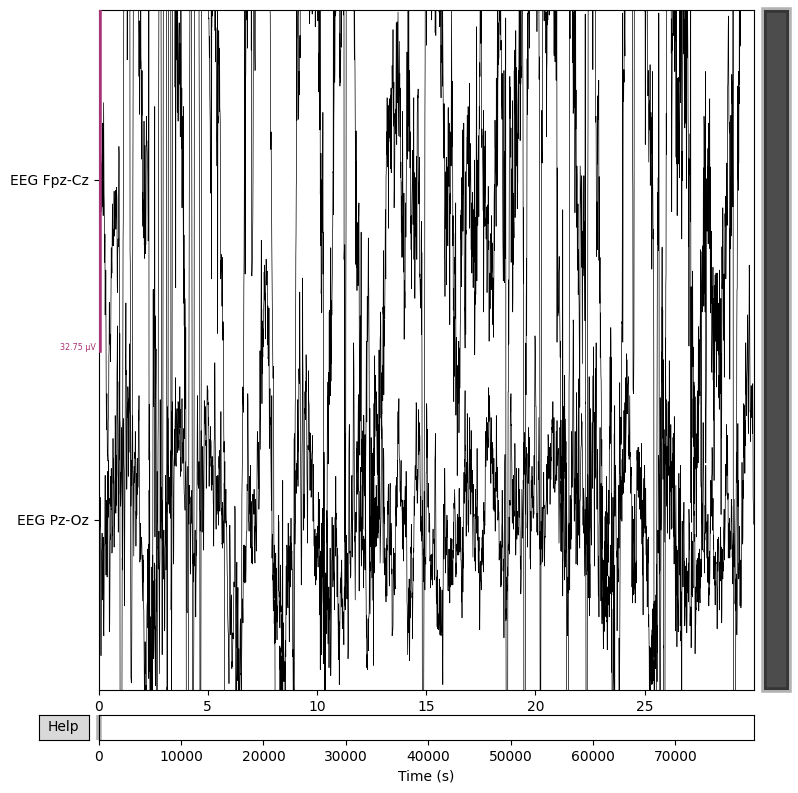

PSD Before Preprocessing (Fpz-Cz channel) - Nyquist: 50.0 Hz
Effective window size : 20.480 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipython-input-3-2589644740.py:34: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=nyquist_before).plot(picks='EEG Fpz-Cz')


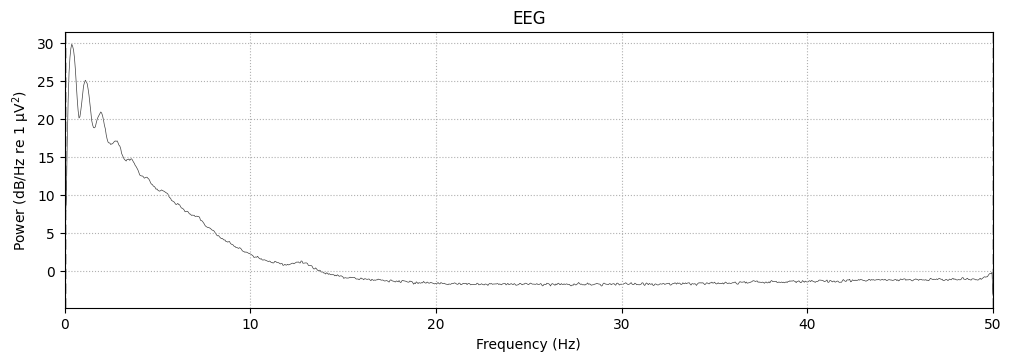

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 661 samples (6.610 s)

Visualizing EEG Signals After Preprocessing (Bandpass + Normalization)


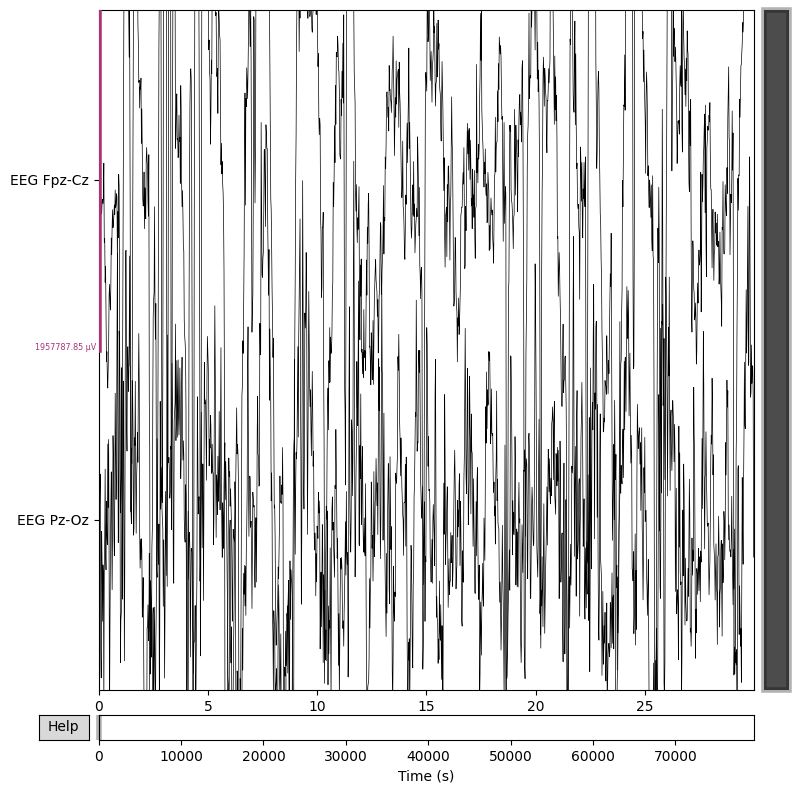

PSD After Preprocessing (Fpz-Cz channel) - Nyquist: 25.0 Hz
Effective window size : 40.960 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


/tmp/ipython-input-3-2589644740.py:61: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=nyquist_after).plot(picks='EEG Fpz-Cz')


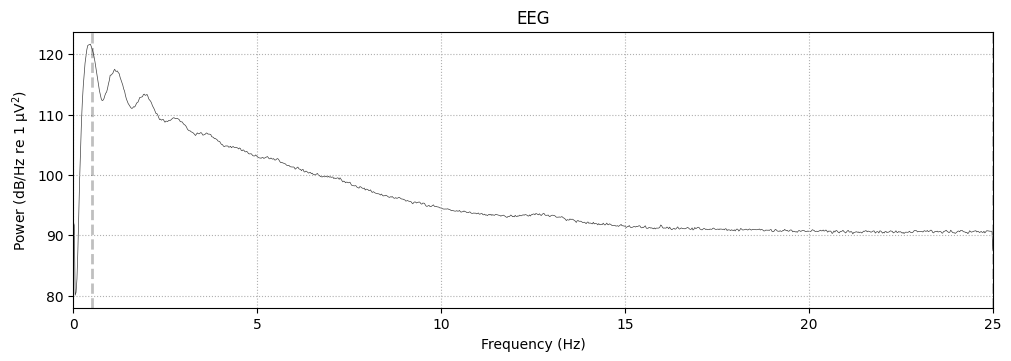

Used Annotations descriptions: [np.str_('Sleep stage 1'), np.str_('Sleep stage 2'), np.str_('Sleep stage 3'), np.str_('Sleep stage 4'), np.str_('Sleep stage ?'), np.str_('Sleep stage R'), np.str_('Sleep stage W')]
Not setting metadata
154 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 154 events and 1500 original time points ...
1 bad epochs dropped


/tmp/ipython-input-3-2589644740.py:66: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw.set_annotations(annotations)


Sample Epochs After Preprocessing


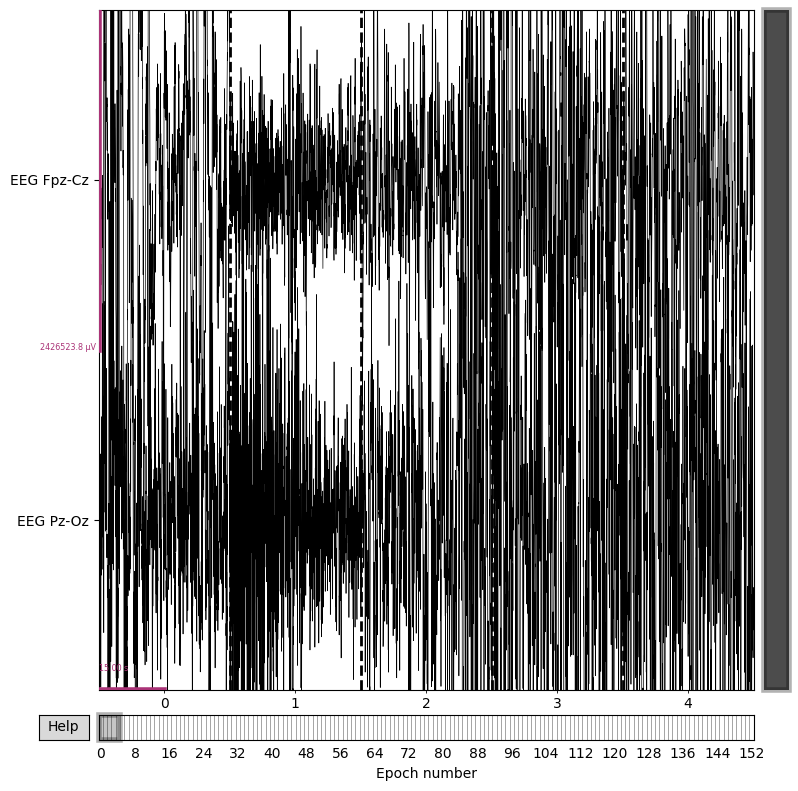

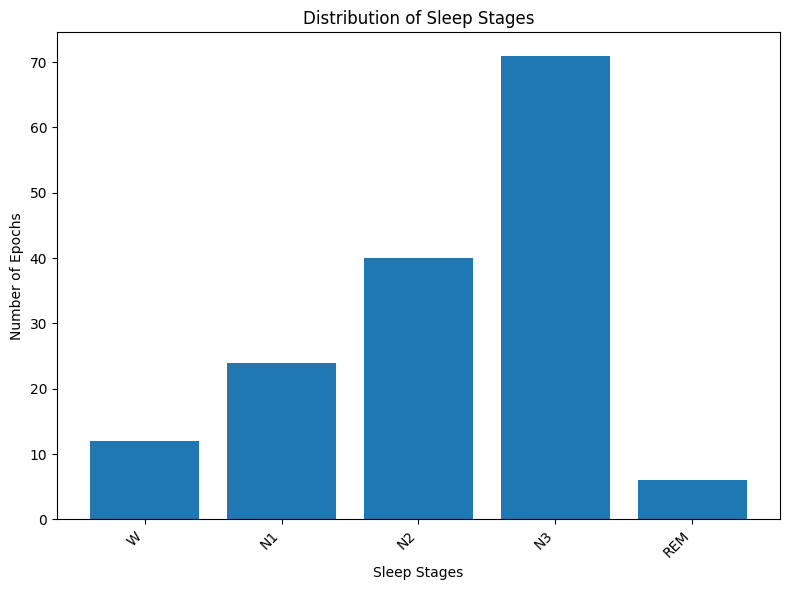

In [3]:
!pip install mne matplotlib numpy

import mne
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib.request

# Sample file URLs from Sleep-EDF Expanded dataset
psg_url = "https://physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4001E0-PSG.edf"
hypno_url = "https://physionet.org/files/sleep-edfx/1.0.0/sleep-cassette/SC4001EC-Hypnogram.edf"

# Download files if not present
psg_file = "SC4001E0-PSG.edf"
hypno_file = "SC4001EC-Hypnogram.edf"

if not os.path.exists(psg_file):
    urllib.request.urlretrieve(psg_url, psg_file)
if not os.path.exists(hypno_file):
    urllib.request.urlretrieve(hypno_url, hypno_file)

# Load raw EEG data (focus on Fpz-Cz and Pz-Oz channels)
raw = mne.io.read_raw_edf(psg_file, preload=True)
raw.pick_channels(['EEG Fpz-Cz', 'EEG Pz-Oz'])

# --- Before Preprocessing: Visualize Raw Signals ---
print("Visualizing Raw EEG Signals (Before Preprocessing)")
raw.plot(duration=30, scalings='auto', title='Raw EEG Signals (Before Preprocessing)')
plt.show()

# Compute and plot PSD before filtering (fmax set to Nyquist: sfreq/2, original sfreq=100 Hz)
nyquist_before = raw.info['sfreq'] / 2
print(f"PSD Before Preprocessing (Fpz-Cz channel) - Nyquist: {nyquist_before} Hz")
raw.compute_psd(fmax=nyquist_before).plot(picks='EEG Fpz-Cz')
plt.show()

# --- Preprocessing Steps ---
# 1. Bandpass filter (0.5-40 Hz)
raw.filter(0.5, 40, fir_design='firwin')

# 2. Resample to 50 Hz (if not already)
if raw.info['sfreq'] != 50:
    raw.resample(50)

# 3. Normalization (Z-score per channel)
data = raw.get_data()
for i in range(data.shape[0]):
    mean = np.mean(data[i])
    std = np.std(data[i])
    data[i] = (data[i] - mean) / std if std != 0 else data[i]
raw._data = data  # Update raw data

# --- After Preprocessing: Visualize Filtered and Normalized Signals ---
print("Visualizing EEG Signals After Preprocessing (Bandpass + Normalization)")
raw.plot(duration=30, scalings='auto', title='EEG Signals After Preprocessing')
plt.show()

# Compute and plot PSD after preprocessing (fmax set to new Nyquist: sfreq/2 = 25 Hz)
nyquist_after = raw.info['sfreq'] / 2
print(f"PSD After Preprocessing (Fpz-Cz channel) - Nyquist: {nyquist_after} Hz")
raw.compute_psd(fmax=nyquist_after).plot(picks='EEG Fpz-Cz')
plt.show()

# Load hypnogram annotations (for context, not altered by preprocessing)
annotations = mne.read_annotations(hypno_file)
raw.set_annotations(annotations)

# Epoch the data (30-second epochs) after preprocessing
events_from_annot, event_dict = mne.events_from_annotations(raw, event_id='auto')
epochs = mne.Epochs(raw, events_from_annot, event_id=event_dict, tmin=0, tmax=30-1/raw.info['sfreq'], baseline=None, preload=True)

# Visualize sample epochs (e.g., first 5 epochs)
print("Sample Epochs After Preprocessing")
epochs.plot(n_epochs=5, scalings='auto')
plt.show()

# Class distribution visualization with improved labels and ordering
# Map full stage names to short labels
stage_map = {
    'Sleep stage W': 'W',
    'Sleep stage 1': 'N1',
    'Sleep stage 2': 'N2',
    'Sleep stage 3': 'N3',
    'Sleep stage 4': 'N3',  # Combined with N3
    'Sleep stage R': 'REM'
}

# Extract stages and map to short labels
stages = [stage_map.get(list(event_dict.keys())[list(event_dict.values()).index(event[2])], 'Unknown')
          for event in events_from_annot if event[2] in event_dict.values()]

# Get unique stages and counts
unique, counts = np.unique(stages, return_counts=True)

# Define desired order: W, N1, N2, N3, REM (if present)
order = ['W', 'N1', 'N2', 'N3', 'REM']
unique_sorted = [stage for stage in order if stage in unique]
counts_sorted = [counts[np.where(unique == stage)[0][0]] for stage in unique_sorted]

# Plot with rotated labels for clarity
plt.figure(figsize=(8, 6))
plt.bar(unique_sorted, counts_sorted)
plt.xlabel('Sleep Stages')
plt.ylabel('Number of Epochs')
plt.title('Distribution of Sleep Stages')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.show()